In [1]:
# RDFlib for working with RDF
# PyDotPlus and Graphviz for visualization
!pip3 install rdflib pydotplus graphviz

     |████████████████████████████████| 407 kB 4.0 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 


In [2]:
import rdflib
from rdflib import Graph, Namespace
from rdflib.namespace import DC,RDF, FOAF, RDFS, XSD
from rdflib import URIRef, BNode, Literal  # we need blanknode
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

In [17]:
# helper function for visualizing RDF graphs
def visualize(g):
  stream = io.StringIO()
  rdf2dot(g, stream, opts = {display})
  dg = pydotplus.graph_from_dot_data(stream.getvalue())
  png = dg.create_png()
  display(Image(png))

In [8]:
g = Graph()
# create graph using turtle 
turtledata = """\
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix owl:  <http://www.w3.org/2002/07/owl#> .
@prefix :     <http://example.org/Climate#> .
:Greenhouse_gas rdf:type		rdfs:Class ;
        			  rdfs:subClassOf :Air_pollutant .
:Person 		rdf:type        rdfs:Class .
:Scientist	rdfs:subClassOf	:Person .
:Physicist	rdfs:subClassOf	:Scientist .
:Chemist		rdfs:subClassOf :Scientist .
:discoverer rdf:type    rdf:Property ;
    	rdfs:domain owl:Thing ;
    	rdfs:range  :Person .
:Carbon_dioxide   rdf:type :Greenhouse_gas ;
					:discoverer  :Jan_Baptist_van_Helmont ;
					:discoverer  :Joseph_Black .
:Jan_Baptist_van_Helmont   rdf:type   :Physicist .
:Joseph_Black	rdf:type	  :Chemist ;
          		rdfs:label   "Joseph Black"@en ;
          		rdfs:comment "co-discovered CO2" ."""
g.parse(data=turtledata, format="turtle")

<Graph identifier=N8c34923016ab415abb26414a9ddcc0ed (<class 'rdflib.graph.Graph'>)>

In [12]:
# print all triples
for s, p, o in g:
  print((s, p, o))

(rdflib.term.URIRef('http://example.org/Climate#Jan_Baptist_van_Helmont'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/Climate#Physicist'))
(rdflib.term.URIRef('http://example.org/Climate#Scientist'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://example.org/Climate#Person'))
(rdflib.term.URIRef('http://example.org/Climate#Joseph_Black'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'), rdflib.term.Literal('co-discovered CO2'))
(rdflib.term.URIRef('http://example.org/Climate#Carbon_dioxide'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/Climate#Greenhouse_gas'))
(rdflib.term.URIRef('http://example.org/Climate#discoverer'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'))
(rdflib.term.URIRef('

In [14]:
# select diffrent serialization formats for the RDF graph
print(g.serialize(format ="turtle")) #RDF/turtle

@prefix : <http://example.org/Climate#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

:Greenhouse_gas a rdfs:Class ;
    rdfs:subClassOf :Air_pollutant .

:Person a rdfs:Class .

:Carbon_dioxide a :Greenhouse_gas ;
    :discoverer :Jan_Baptist_van_Helmont,
        :Joseph_Black .

:discoverer a rdf:Property ;
    rdfs:domain owl:Thing ;
    rdfs:range :Person .

:Chemist rdfs:subClassOf :Scientist .

:Jan_Baptist_van_Helmont a :Physicist .

:Joseph_Black a :Chemist ;
    rdfs:label "Joseph Black"@en ;
    rdfs:comment "co-discovered CO2" .

:Physicist rdfs:subClassOf :Scientist .

:Scientist rdfs:subClassOf :Person .




In [15]:
print(g.serialize(format = "xml"))

<?xml version="1.0" encoding="UTF-8"?>
<rdf:RDF
   xmlns="http://example.org/Climate#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://example.org/Climate#Jan_Baptist_van_Helmont">
    <rdf:type rdf:resource="http://example.org/Climate#Physicist"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Climate#Scientist">
    <rdfs:subClassOf rdf:resource="http://example.org/Climate#Person"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Climate#Joseph_Black">
    <rdf:type rdf:resource="http://example.org/Climate#Chemist"/>
    <rdfs:label xml:lang="en">Joseph Black</rdfs:label>
    <rdfs:comment>co-discovered CO2</rdfs:comment>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Climate#Carbon_dioxide">
    <rdf:type rdf:resource="http://example.org/Climate#Greenhouse_gas"/>
    <discoverer rdf:resource="http://example.org/Cl

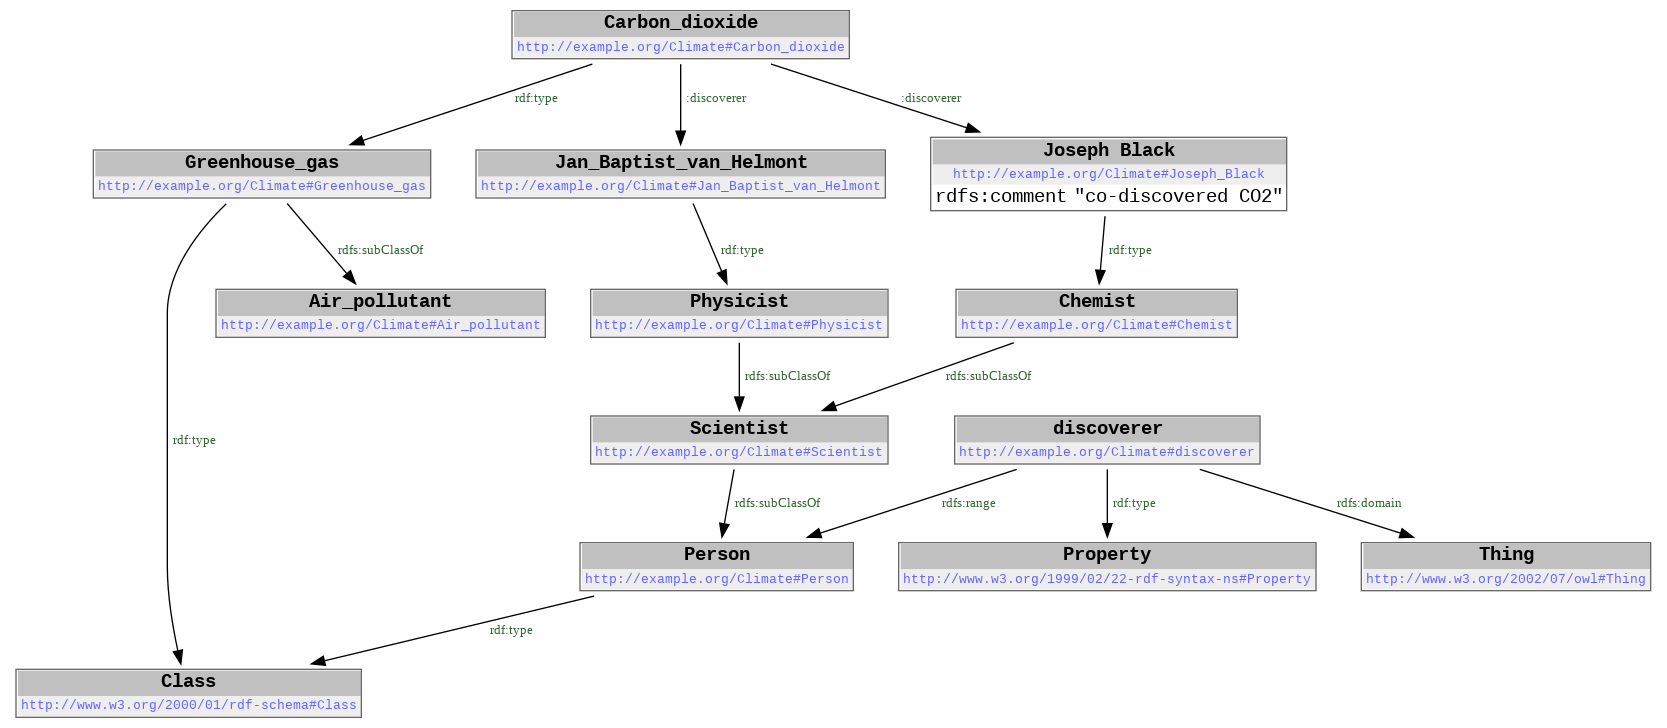

In [18]:
visualize(g)

In [19]:
# lookup information for a given URI
joe = URIRef("http://example.org/Climate#Joseph_Black")
joe

rdflib.term.URIRef('http://example.org/Climate#Joseph_Black')

In [20]:
print([o for o in g.predicate_objects(subject=joe)])

[(rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/Climate#Chemist')), (rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Joseph Black', lang='en')), (rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'), rdflib.term.Literal('co-discovered CO2'))]


In [22]:
# manipulate graph and some information
n = Namespace("http://example.org/Climate#")
birthdate = Literal("1728-4-16") # passing a date
name = Literal("joe Black") # passing a string
age = Literal(24)
height = Literal(172.4)

jan = URIRef("http://example.org/Climate#Jan_Baptist_van_Helmont")
name2 = Literal("Jan van Helmont")

# adding RDF triples
g.add((joe, RDF.type, FOAF.Person))
g.add((joe, FOAF.name, name))
g.add((joe,n.age,age))
g.add((joe, n.birthdate, birthdate))
g.add((joe,n.height, height))
g.add((jan, FOAF.name,name2))

# print all triples
for s,p,o in g :
  print((s,p,o))

(rdflib.term.URIRef('http://example.org/Climate#Joseph_Black'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'), rdflib.term.Literal('joe Black'))
(rdflib.term.URIRef('http://example.org/Climate#Scientist'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://example.org/Climate#Person'))
(rdflib.term.URIRef('http://example.org/Climate#Jan_Baptist_van_Helmont'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/Climate#Physicist'))
(rdflib.term.URIRef('http://example.org/Climate#Joseph_Black'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'), rdflib.term.Literal('co-discovered CO2'))
(rdflib.term.URIRef('http://example.org/Climate#Joseph_Black'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))
(rdflib.term.URIRef('http://example.org/Climate#Carbon_dioxide'), rdflib.term.URIRef('ht

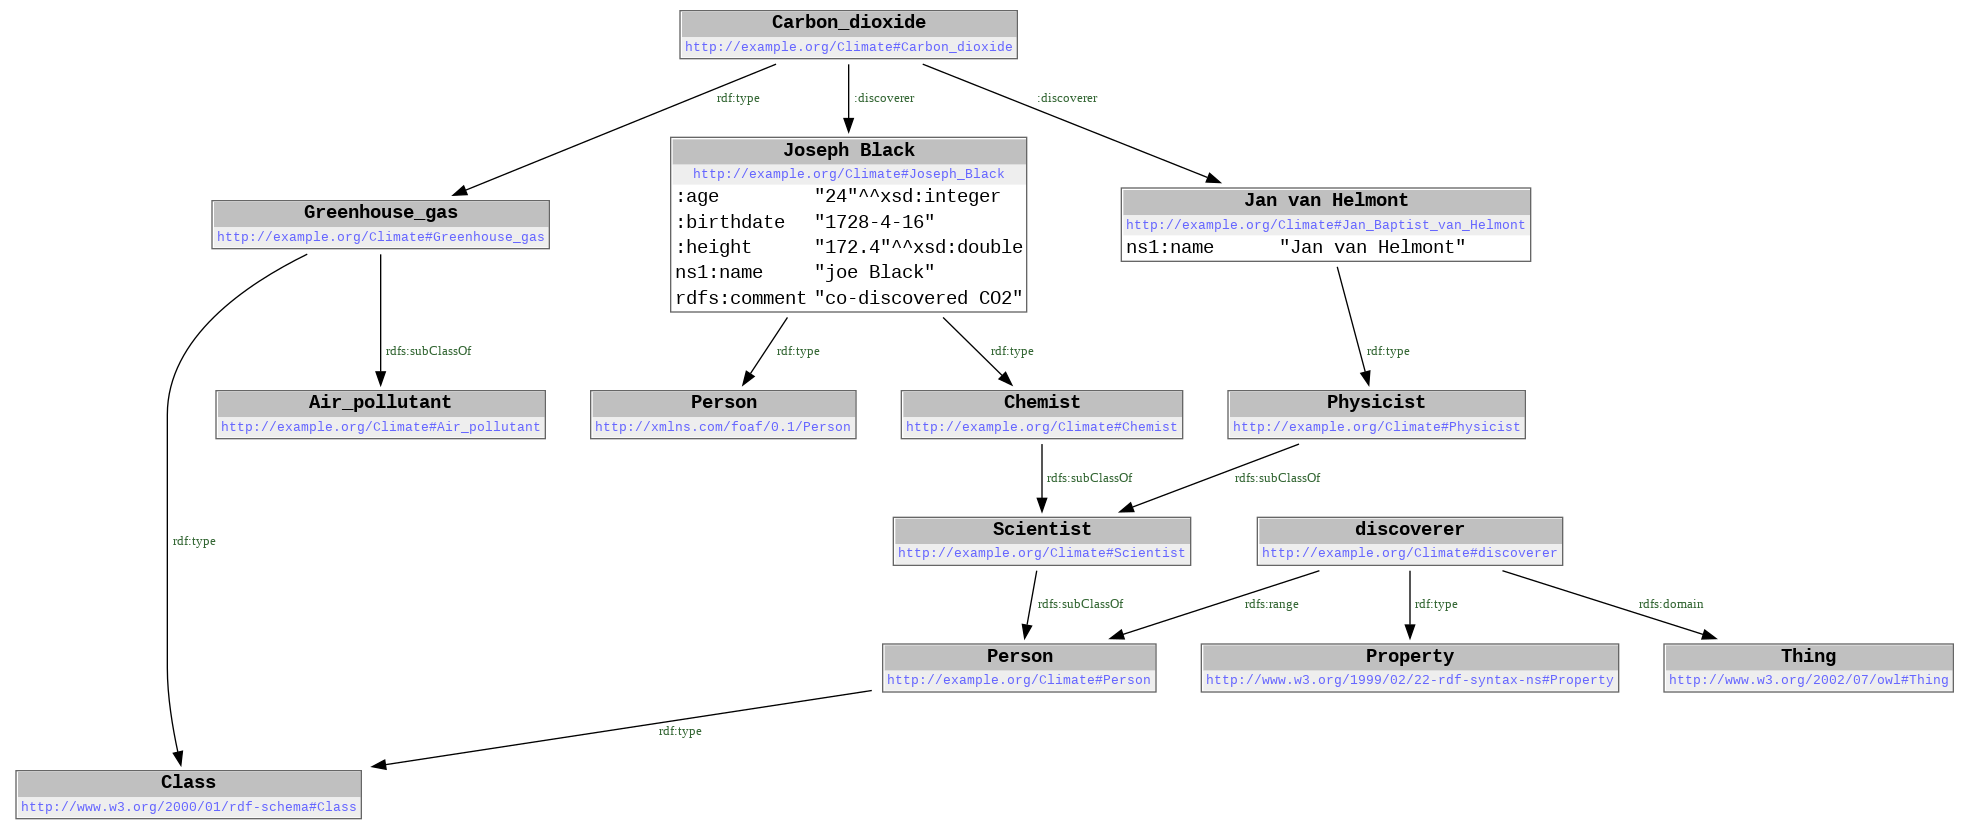

In [23]:
 visualize(g)

In [49]:
# use SPARQL  we can query our example graph
# who discovered co2?
result = g.query(
"""
PREFIX n: <http://example.org/Climate#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>

SELECT ?discovererLabel WHERE
  {
    n:Carbon_dioxide n:discoverer ?discoverer .
    ?discoverer foaf:name ?discovererLabel .
    }"""
)

In [50]:
# output result
for row in result:
  print("CO2 was discoverd by %s" %row)

CO2 was discoverd by Jan van Helmont
CO2 was discoverd by joe Black
